<a href="https://colab.research.google.com/github/jcallaghan2020/Artificial-Intelligence/blob/main/nqueens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Failed
Failed
Failed
Failed
Failed
Failed
Failed
Failed
Failed
Failed
Failed
Failed
Failed
Failed
Failed
Failed
Failed
Failed
Failed
Failed
Failed
Failed
Failed
Failed
Successful Solution:
0 => 0
1 => 20
2 => 25
3 => 23
4 => 33
5 => 41
6 => 30
7 => 40
8 => 17
9 => 31
10 => 24
11 => 52
12 => 29
13 => 1
14 => 15
15 => 50
16 => 28
17 => 6
18 => 62
19 => 5
20 => 51
21 => 48
22 => 27
23 => 38
24 => 19
25 => 3
26 => 58
27 => 4
28 => 54
29 => 45
30 => 26
31 => 61
32 => 22
33 => 39
34 => 21
35 => 10
36 => 57
37 => 44
38 => 49
39 => 37
40 => 2
41 => 59
42 => 8
43 => 35
44 => 16
45 => 13
46 => 56
47 => 60
48 => 11
49 => 18
50 => 47
51 => 53
52 => 46
53 => 9
54 => 36
55 => 34
56 => 32
57 => 7
58 => 43
59 => 14
60 => 63
61 => 42
62 => 55
63 => 12
It takes 25 repetitions to succeed. Runtime in second 6.799971:


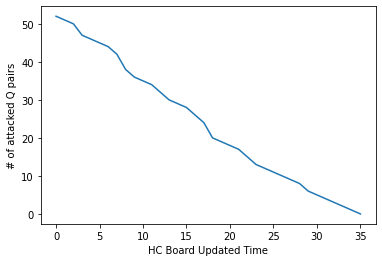

In [ ]:
import random
from math import exp
import time
from copy import deepcopy
import matplotlib.pyplot as plt

N_QUEENS = 64
TEMPERATURE = 4000


def threat_calculate(n):
    '''Combination formular. It is choosing two queens in n queens'''
    if n < 2:
        return 0
    if n == 2:
        return 1
    return (n - 1) * n / 2


def create_board(n):
    '''Create a chess boad with a queen on a row'''
    chess_board = {}
    temp = list(range(n))
    random.shuffle(temp)  # shuffle to make sure it is random
    column = 0

    while len(temp) > 0:
        row = random.choice(temp)
        chess_board[column] = row
        temp.remove(row)
        column += 1
    del temp
    return chess_board


def cost(chess_board):
    '''Calculate how many pairs of threaten queen'''
    threat = 0
    m_chessboard = {}
    a_chessboard = {}

    for column in chess_board:
        temp_m = column - chess_board[column]
        temp_a = column + chess_board[column]
        if temp_m not in m_chessboard:
            m_chessboard[temp_m] = 1
        else:
            m_chessboard[temp_m] += 1
        if temp_a not in a_chessboard:
            a_chessboard[temp_a] = 1
        else:
            a_chessboard[temp_a] += 1

    for i in m_chessboard:
        threat += threat_calculate(m_chessboard[i])
    del m_chessboard

    for i in a_chessboard:
        threat += threat_calculate(a_chessboard[i])
    del a_chessboard

    return threat

def hill_climbing():
    '''Hill Climbing Search'''
    solution_found = False
    answer = create_board(N_QUEENS)

    # To avoid recounting when can not find a better state
    cost_answer = cost(answer)
    
    # Record costs:
    Costs=[]
    Costs.append(cost_answer)

    t = TEMPERATURE
    sch = 0.99

    while t > 0.00001:
        t *= sch
        successor = deepcopy(answer)
        while True:
            index_1 = random.randrange(0, N_QUEENS - 1)
            index_2 = random.randrange(0, N_QUEENS - 1)
            if index_1 != index_2:
                break
        successor[index_1], successor[index_2] = successor[index_2], \
            successor[index_1]  # swap two chosen queens
        
        delta = cost(successor) - cost_answer
        if delta < 0:
            answer = deepcopy(successor)
            cost_answer = cost(answer)
            Costs.append(cost_answer)
        if cost_answer == 0:
            solution_found = True
            print("Successful Solution:")
            print_chess_board(answer)            
            break
    if solution_found is False:
        print("Failed")
        return(False,Costs)
    else:
        return(True,Costs)

def simulated_annealing():
    '''Simulated Annealing'''
    solution_found = False
    answer = create_board(N_QUEENS)

    # To avoid recounting when can not find a better state
    cost_answer = cost(answer)
    
    # Record costs:
    Costs=[]
    Costs.append(cost_answer)

    t = TEMPERATURE
    sch = 0.99

    while t > 0.00001:
        t *= sch
        successor = deepcopy(answer)
        while True:
            index_1 = random.randrange(0, N_QUEENS - 1)
            index_2 = random.randrange(0, N_QUEENS - 1)
            if index_1 != index_2:
                break
        successor[index_1], successor[index_2] = successor[index_2], \
            successor[index_1]  # swap two chosen queens
        
        delta = cost(successor) - cost_answer
        if delta < 0 or random.uniform(0, 1) < exp(-delta / t):
            answer = deepcopy(successor)
            cost_answer = cost(answer)
            Costs.append(cost_answer)
        if cost_answer == 0:
            solution_found = True
            print("Successful Solution:")
            print_chess_board(answer)            
            break
    if solution_found is False:
        print("Failed")
        return(False,Costs)
    else:
        return(True,Costs)
    

def print_chess_board(board):
    '''Print the chess board'''
    for column, row in board.items():
        print("{} => {}".format(column, row))


def main(method='HC'):
    start = time.time()
    Success=False
    repetitions=0
    while not Success:
        if method=='SA':
            Success,Costs=simulated_annealing()
            repetitions=repetitions+1
        elif method=='HC':
            Success,Costs=hill_climbing()
            repetitions=repetitions+1
    print("It takes %d repetitions to succeed. Runtime in second %f:"% (repetitions,(time.time() - start)))
    return(Success,Costs)


if __name__ == "__main__":
    method='HC'
    Success,Costs=main(method)  # HC: hill_climbing or SA: Simulated annealing
    plt.plot(Costs)
    plt.xlabel(method+' Board Updated Time')
    plt.ylabel('# of attacked Q pairs')